<a href="https://colab.research.google.com/github/Ishan-Khanal/Ishan-Khanal--CPSMA-3933-01/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# --- Set 03, Problem 3 ---
Given the system of inequalities below, determine the shape of the feasible region and find the vertices of the feasible region. Give the shape as "triangle", "quadrilateral", or "unbounded". Report your vertices starting with the one which has the smallest 𝑥-value. If more than one vertex has the same, smallest 𝑥-value, start with the one that has the smallest 𝑦-value. Proceed clockwise from the first vertex. Leave any unnecessary answer spaces blank.

𝑥+𝑦≥52. 𝑥+𝑦≥6. 𝑥≥0. 𝑦≥0

Vertices (clockwise, start at smallest x): [(0, 6), (1.0, 4.0), (5, 0)]
Shape: unbounded
P(0, 6) = 12
P(1.0, 4.0) = 11.0
P(5, 0) = 15
Conclusion: Objective is unbounded above (no finite maximum).


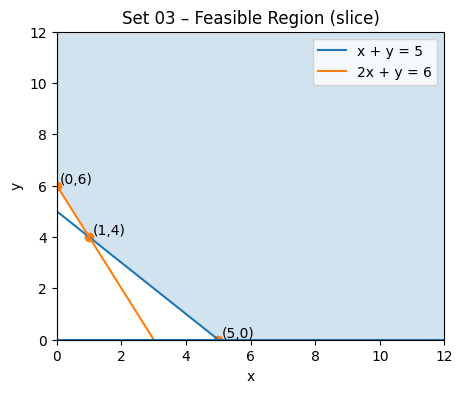

linprog status: 3 The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is Feasible)


In [1]:


import numpy as np
import itertools
import matplotlib.pyplot as plt

# 1) Compute vertices by pairwise intersections that lie in the feasible set
def intersect(a1,b1,c1, a2,b2,c2):
    A = np.array([[a1,b1],[a2,b2]], float)
    B = np.array([c1,c2], float)
    return np.linalg.solve(A,B)

def feasible(x,y):
    return (x >= 0) and (y >= 0) and (x + y >= 5 - 1e-9) and (2*x + y >= 6 - 1e-9)

cands = []

# Axis intersections
# with x=0
x, y = 0, 5
if feasible(x,y): cands.append((x,y))
x, y = 0, 6
if feasible(x,y): cands.append((x,y))

# with y=0
x, y = 5, 0
if feasible(x,y): cands.append((x,y))
x, y = 3, 0
if feasible(x,y): cands.append((x,y))

# Line-line intersection
x, y = intersect(1,1,5, 2,1,6)  # x+y=5 and 2x+y=6
if feasible(x,y): cands.append((float(x), float(y)))

# Unique vertices
verts = []
for p in cands:
    if not any(np.allclose(p, q) for q in verts):
        verts.append(p)

# Order clockwise starting with smallest x (break ties by smallest y)
start_idx = min(range(len(verts)), key=lambda i: (verts[i][0], verts[i][1]))
# simple clockwise sort around centroid
cx, cy = np.mean(verts, axis=0)
ordered = sorted(verts, key=lambda p: np.arctan2(p[1]-cy, p[0]-cx))
# rotate so the smallest-x-first vertex is first
k = next(i for i,p in enumerate(ordered) if np.allclose(p, verts[start_idx]))
ordered = ordered[k:] + ordered[:k]

print("Vertices (clockwise, start at smallest x):", ordered)
print("Shape: unbounded")

# 2) Evaluate objective at vertices
def P(x,y): return 3*x + 2*y
for v in ordered:
    print(f"P{tuple(v)} = {P(*v)}")
print("Conclusion: Objective is unbounded above (no finite maximum).")

# 3) Plot feasible region slice
xs = np.linspace(0, 12, 400)
y1 = 5 - xs              # x + y = 5
y2 = 6 - 2*xs            # 2x + y = 6

plt.figure(figsize=(5,4))
plt.plot(xs, y1, label="x + y = 5")
plt.plot(xs, y2, label="2x + y = 6")
plt.axhline(0); plt.axvline(0)

# Shade a large box portion that satisfies both >= constraints
Y = np.maximum(y1, y2)  # boundary we must be above
plt.fill_between(xs, Y, 12, alpha=0.2, step='mid')  # slice of the unbounded region

# mark vertices
vx, vy = zip(*ordered)
plt.scatter(vx, vy)
for (x,y) in ordered:
    plt.text(x+0.1, y+0.1, f"({x:.0f},{y:.0f})")

plt.xlim(0,12); plt.ylim(0,12)
plt.legend(); plt.title("Set 03 – Feasible Region (slice)")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

# 4) Solver check (unbounded)
from scipy.optimize import linprog

# maximize 3x+2y  <=>  minimize -(3x+2y)
c = [-3, -2]
A_ub = [
    [-1, -1],   # -(x+y) <= -5
    [-2, -1],   # -(2x+y) <= -6
]
b_ub = [-5, -6]
bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")
print("linprog status:", res.status, res.message)


# --- Set 04, Problem 6 ---

A company manufactures two models of snowboards, standard and deluxe. Each deluxe model requires 20 hours to produce, and 60 units of material. Each standard model requires 10 hours to produce and 50 units of material. The company has 760 production hours available and 2800 units of material in stock. The deluxe model sells for $342 and the standard model sells for $190.

What amount of each model should be produced and sold to obtain the maximum revenue?

Corner points:
(d,s)=(38,0)  ->  R = 12996
(d,s)=(0,56)  ->  R = 10640
(d,s)=(25,26)  ->  R = 13490

Optimal: d=25, s=26,  Revenue = $13490


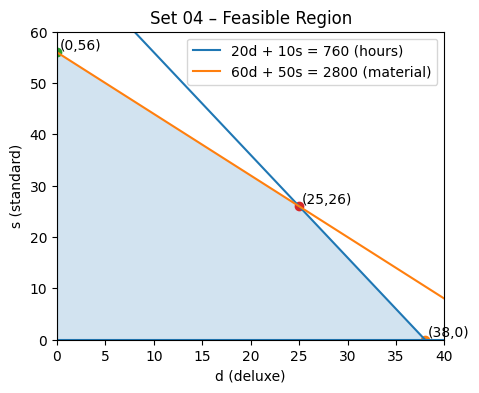

linprog status: 0 Optimization terminated successfully. (HiGHS Status 7: Optimal)
linprog solution: d=25, s=26,  Revenue=$13490


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# 1) Enumerate corner points
corners = []

# Axes corners
corners.append((38, 0))  # from 20d + 10s <= 760 with s=0
corners.append((0, 56))  # from 60d + 50s <= 2800 with d=0

# Intersection of the two resource lines
A = np.array([[20,10],[60,50]], float)
b = np.array([760,2800], float)
d_int, s_int = np.linalg.solve(A,b)
corners.append((float(d_int), float(s_int)))

def R(d,s): return 342*d + 190*s

print("Corner points:")
for d,s in corners:
    print(f"(d,s)=({d:.0f},{s:.0f})  ->  R = {R(d,s):.0f}")

best = max(corners, key=lambda p: R(*p))
print(f"\nOptimal: d={best[0]:.0f}, s={best[1]:.0f},  Revenue = ${R(*best):.0f}")

# 2) Plot feasible region and objective direction
d_vals = np.linspace(0, 40, 400)
s_hours = (760 - 20*d_vals)/10
s_mat   = (2800 - 60*d_vals)/50

plt.figure(figsize=(5,4))
plt.plot(d_vals, s_hours, label="20d + 10s = 760 (hours)")
plt.plot(d_vals, s_mat,   label="60d + 50s = 2800 (material)")
plt.axhline(0); plt.axvline(0)
plt.xlim(0, 40); plt.ylim(0, 60)
plt.fill_between(d_vals, 0, np.minimum(s_hours, s_mat), alpha=0.2, step='mid')
for d,s in corners:
    plt.scatter([d],[s])
    plt.text(d+0.3, s+0.6, f"({int(round(d))},{int(round(s))})")
plt.xlabel("d (deluxe)"); plt.ylabel("s (standard)")
plt.title("Set 04 – Feasible Region")
plt.legend(); plt.show()

# 3) Solver check (maximize R <=> minimize -R)
c = [-342, -190]
A_ub = [
    [20, 10],    # hours
    [60, 50],    # material
]
b_ub = [760, 2800]
bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")
d_opt, s_opt = res.x
print("linprog status:", res.status, res.message)
print(f"linprog solution: d={d_opt:.0f}, s={s_opt:.0f},  Revenue=${-res.fun:.0f}")
